Bundesliga Spieler Analyse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Beispiel: Datei aus Google Drive laden, ggf Pfad anpassen - df = pd.read_csv('/bundesliga_player.csv')
df = pd.read_csv('/content/drive/MyDrive/Python_DataScience/ML/bundesliga_player.csv')
print(df.info(),"\n")
print(df.describe(),"\n")
print(df.head(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        515 non-null    int64  
 1   name              515 non-null    object 
 2   full_name         229 non-null    object 
 3   age               515 non-null    int64  
 4   height            515 non-null    float64
 5   nationality       515 non-null    object 
 6   place_of_birth    510 non-null    object 
 7   price             510 non-null    float64
 8   max_price         510 non-null    float64
 9   position          515 non-null    object 
 10  shirt_nr          515 non-null    int64  
 11  foot              506 non-null    object 
 12  club              515 non-null    object 
 13  contract_expires  481 non-null    object 
 14  joined_club       515 non-null    object 
 15  player_agent      488 non-null    object 
 16  outfitter         193 non-null    object 
dt

**Welche Nummer ist am häufigsten vertreten?**

shirt_nr
1     23
8     18
17    17
5     17
27    16
11    16
20    16
22    15
7     15
25    15
23    15
4     15
19    15
3     14
6     14
21    14
10    14
9     13
30    13
24    13
28    12
18    12
2     12
14    11
29    11
32    10
16    10
13    10
26    10
38     9
40     9
35     9
34     8
39     8
33     7
36     7
31     7
42     7
44     6
37     6
12     5
15     5
45     5
41     4
43     2
48     2
49     1
46     1
47     1
Name: count, dtype: int64


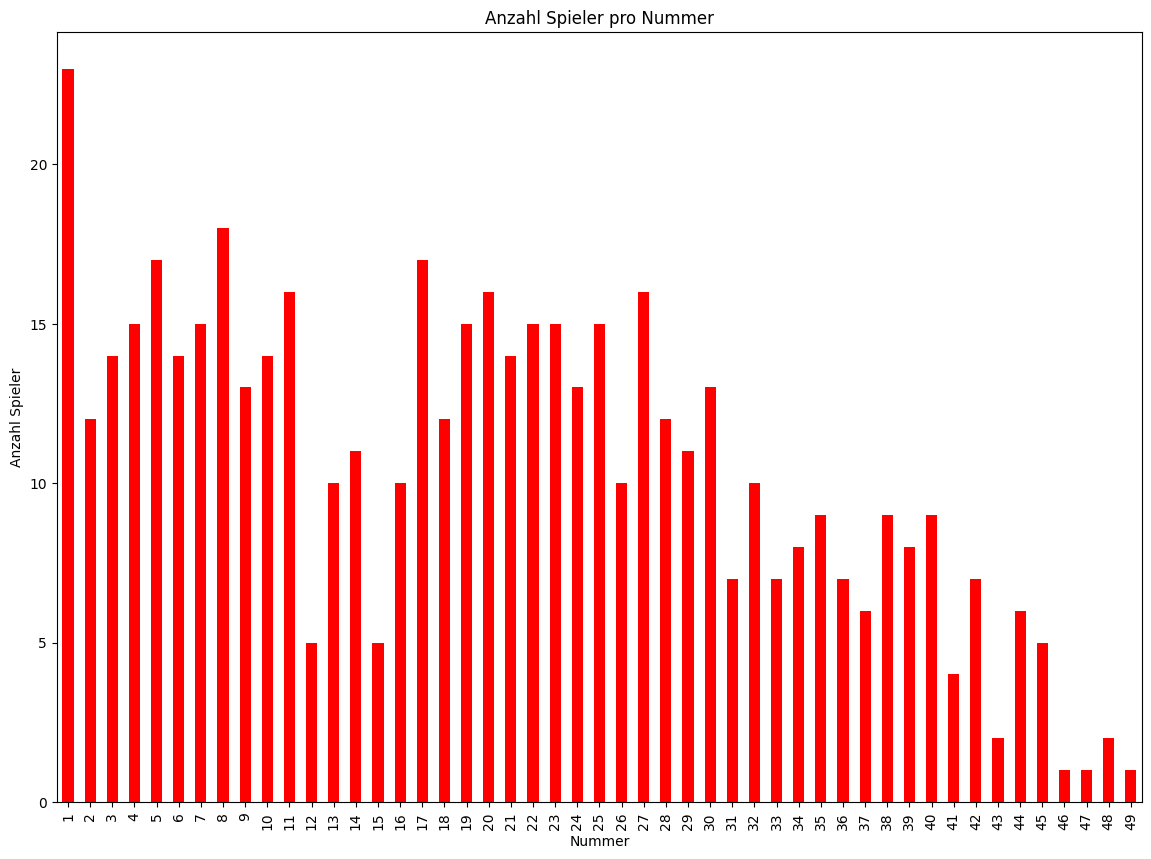

In [2]:
nummerverteilung = df["shirt_nr"].value_counts()
print(nummerverteilung)

nummerverteilung = nummerverteilung.sort_index()

nummerverteilung.plot(kind="bar", figsize=(14, 10), color="red")
plt.title("Anzahl Spieler pro Nummer")
plt.xlabel("Nummer")
plt.ylabel("Anzahl Spieler")
plt.show()

**Welches Alter ist am häufigsten vertreten?**

age
24    43
25    40
26    39
22    36
23    34
27    34
29    34
21    31
28    30
30    28
20    27
31    24
19    23
32    21
18    19
33    15
34    11
17     9
35     8
38     3
36     3
37     2
39     1
Name: count, dtype: int64


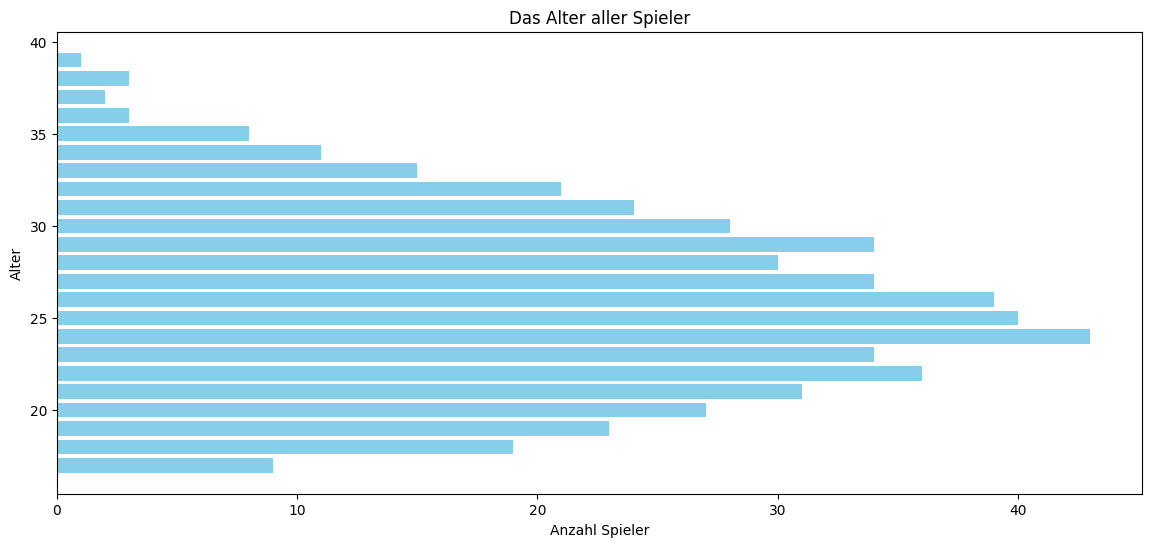

Mittelwert Alter: 25.683495145631067
Median Alter: 25.0
Minimum Alter: 17
Maximum Alter: 39
Anzahl Spieler: 515


In [3]:
altersverteilung = df["age"].value_counts()
print(altersverteilung)

# Sortierung
altersverteilung = altersverteilung.sort_index()

# Erstelle das horizontale Balkendiagramm
plt.figure(figsize=(14, 6))
plt.barh(altersverteilung.index, altersverteilung.values, color='skyblue')
plt.xlabel("Anzahl Spieler")
plt.ylabel("Alter")
plt.title("Das Alter aller Spieler")
plt.show()


# Weitere Werte zum Alter der Spieler:
mittelwert_alter = df["age"].mean()
median_alter = df["age"].median()
min_alter = df["age"].min()
max_alter = df["age"].max()
anzahl_spieler = len(df["age"])

print("Mittelwert Alter:", mittelwert_alter)
print("Median Alter:", median_alter)
print("Minimum Alter:", min_alter)
print("Maximum Alter:", max_alter)
print("Anzahl Spieler:", anzahl_spieler)


In [4]:
# Wer ist der wertvollste Spieler?

for i in range(len(df)):
    if df.loc[i, "price"] == df["price"].max():
        print(f"Der wertvollste Spieler ist: \n{df.loc[i, 'name']}\nWert in €: {df.loc[i, 'price']}\nAlter: {df.loc[i, 'age']}")


Der wertvollste Spieler ist: 
Jude Bellingham
Wert in €: 120.0
Alter: 19


Während der Arbeiten ist mir aufgefallen, dass es wohl nan-Werte bei den Preisen gibt, daher müssen diese bereinigt werden:

In [5]:
anzahl_price_werte = len(df["price"])
anzahl_age_werte = len(df["age"])
print("Anzahl der Werte in der Spalte 'price':", anzahl_price_werte)
print("Anzahl der Werte in der Spalte 'age':", anzahl_age_werte)
print("-----")
print("Anzahl der NaN-Werte in 'price': ", df["price"].isnull().sum(), "von ",len(df["price"]))
print("Anzahl der NaN-Werte in 'age': ", df["age"].isnull().sum(), "von ",len(df["age"]))
print("-----")
df = df.dropna(subset=["price"])
print("Aktualisierte Anzahl der NaN-Werte in 'price: ", df["price"].isnull().sum(), "von " ,len(df["price"]))
print("Aktualisierte Anzahl der Werte in 'age': ", len(df["age"]))

Anzahl der Werte in der Spalte 'price': 515
Anzahl der Werte in der Spalte 'age': 515
-----
Anzahl der NaN-Werte in 'price':  5 von  515
Anzahl der NaN-Werte in 'age':  0 von  515
-----
Aktualisierte Anzahl der NaN-Werte in 'price:  0 von  510
Aktualisierte Anzahl der Werte in 'age':  510


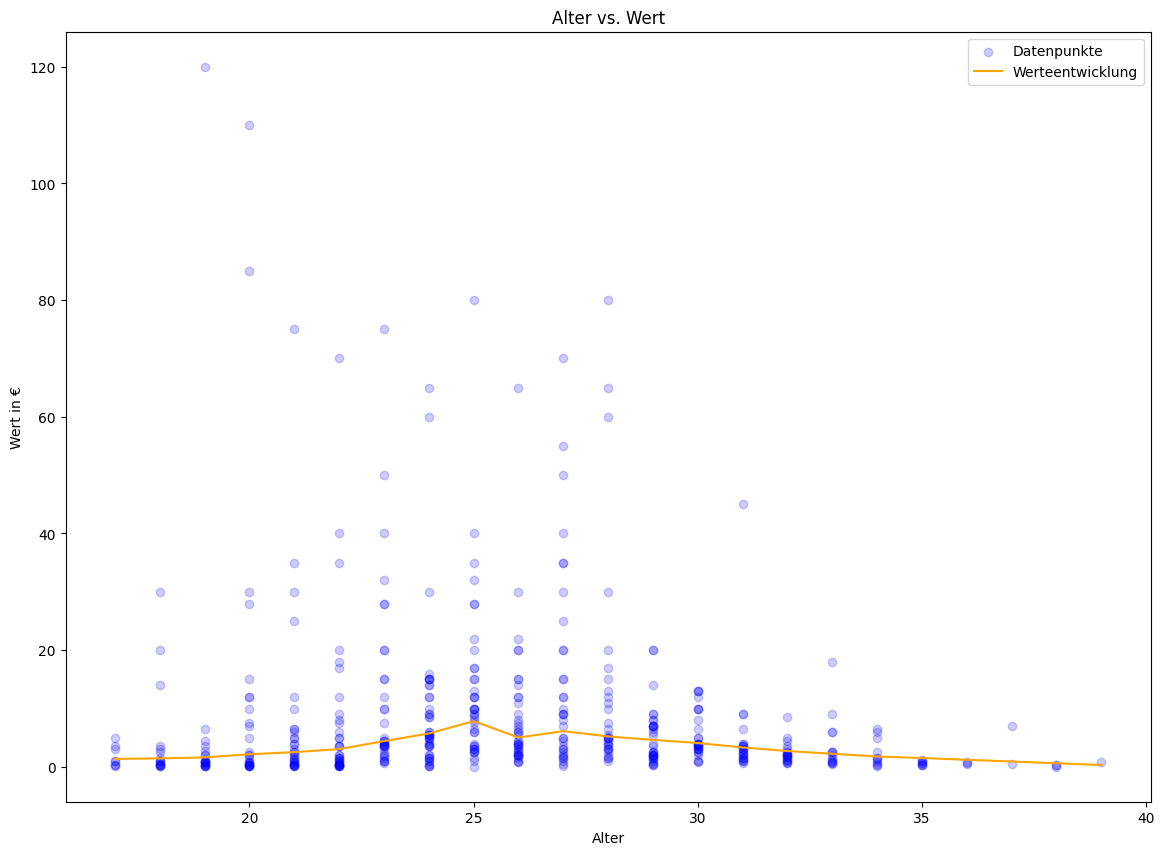

In [14]:
# Punkteplot erstellen

x = df['age']
y = df['price']

plt.figure(figsize=(14, 10))
plt.scatter(x, y, color='blue', label='Datenpunkte', alpha=0.2)
# LOWESS Kurve berechnen und hinzufügen
lowess = sm.nonparametric.lowess(y, x, frac=0.2)  # 'frac' steuert die Glättung
plt.plot(lowess[:, 0], lowess[:, 1], color='orange', label='Werteentwicklung')

plt.xlabel('Alter')
plt.ylabel('Wert in €')
plt.title('Alter vs. Wert')
plt.legend()
plt.show()

In [7]:
# Korrelation berechnen (Alter - Wert)

corr = df['age'].corr(df['price'])
print(f"Korrelationskoeffizient Alter/Wert: {corr}\n")

Korrelationskoeffizient Alter/Wert: -0.10347264909934657



Laut dem Korrelationskoeffizienten gibt es nur eine sehr schwache Korrelation zwischen dem Alter und dem Wert eines Spielers, daher gibt es nur einen ungenügenden linearen Zuammenhang.

In [16]:
# Zusammenrechnung aller Werte je Alter

alter_verteilung = df.groupby("age")["price"].sum()
alter_verteilung.sort_values(ascending=False, inplace=True)
print(alter_verteilung)

age
25    528.525
27    520.900
23    421.300
24    411.450
28    405.800
26    344.350
20    334.500
22    278.700
21    244.550
29    174.700
30    153.900
19    149.350
31    116.500
18     79.700
33     54.800
32     50.200
34     26.200
17     14.250
37      7.500
35      5.600
36      2.000
39      0.800
38      0.650
Name: price, dtype: float64


**Auf welcher Position sind die größten und kleinsten Spieler?**

In [9]:
# Check über alle Positionen
alle_positionen = df.groupby("position")["name"].count()
alle_positionen = alle_positionen.sort_values(ascending=False)
print(alle_positionen)

position
Defender - Centre-Back           87
Attack - Centre-Forward          72
Goalkeeper                       68
midfield - Central Midfield      56
Defender - Right-Back            43
Defender - Left-Back             40
midfield - Defensive Midfield    40
midfield - Attacking Midfield    39
Attack - Right Winger            30
Attack - Left Winger             22
Attack - Second Striker           7
midfield - Right Midfield         4
midfield - Left Midfield          2
Name: name, dtype: int64


In [10]:
max_height = df["height"].max()
print(max_height, "m")

min_height = df["height"].min()
print(min_height, "m")

2.0 m
1.68 m


In [11]:
for i in df.index:
    if df.loc[i, "height"] == df["height"].max():
        print(f"Der größte Spieler ist: \n{df.loc[i, 'name']}\nPosition: {df.loc[i, 'position']}\n")
for i in df.index:
    if df.loc[i, "height"] == df["height"].min():
        print(f"Der kleinste Spieler ist: \n{df.loc[i, 'name']}\nPosition: {df.loc[i, 'position']}\n")


Der größte Spieler ist: 
Florian Schock
Position: Goalkeeper

Der kleinste Spieler ist: 
Romano Schmid
Position: midfield - Attacking Midfield



**Wie ist die Verteilung der Größe der Spieler auf die Positionen bezogen?**


In [12]:
# Zusammenfassung von Positionen
# Z.b. werden 'midfield - left midfield' als 'midfield' korrigiert

df_position_aktualisiert = df['main_position'] = df.position.str.split(' ').str[0].tolist()
anzahl_positionen = df.groupby("main_position")["name"].count()
print(anzahl_positionen)

main_position
Attack        131
Defender      170
Goalkeeper     68
midfield      141
Name: name, dtype: int64


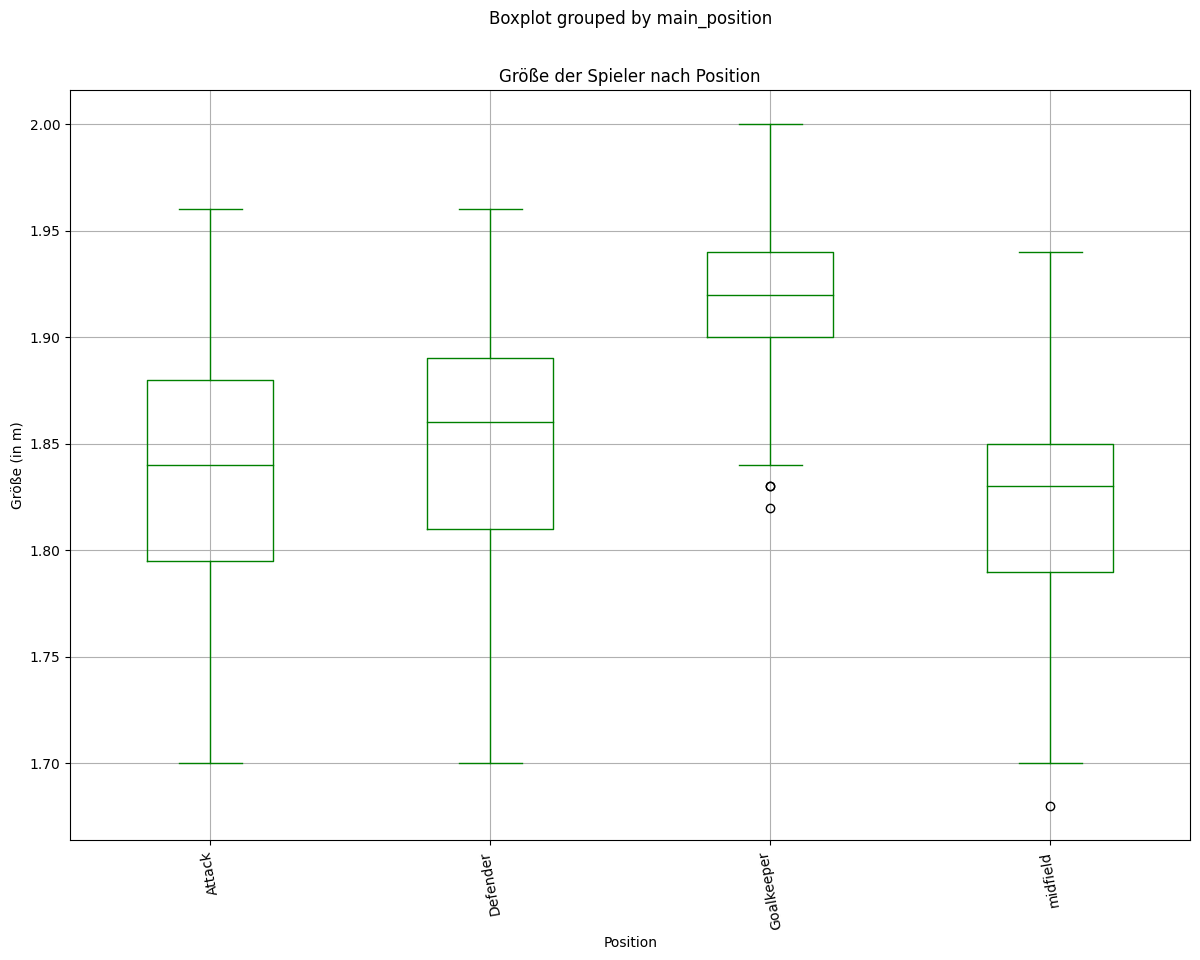

In [13]:
df.boxplot(column=['height'], by='main_position', grid=True, color='green', figsize=(14, 10))
plt.xticks(rotation=100)
plt.xlabel('Position')
plt.ylabel('Größe (in m)')
plt.title('Größe der Spieler nach Position')
plt.show()

**Der Boxplot zeigt eindeutig: Die größten Spieler sind Torwärter**